### In this notebook we are going to look at the various Regression techniques for this basic beginners dataset on Diamonds and predict the prices of diamonds based on their various properties.

## Make some Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('diamonds.csv')

## Data Handling

In [35]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
data = data.drop('Unnamed: 0',axis=1)

In [37]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [39]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
data[['x','y','z']] = data[['x','y','z']].replace(0,np.nan)

In [42]:
data.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [43]:
data.dropna(inplace=True)

In [45]:
data.shape

(53920, 10)

## Data Visualisation

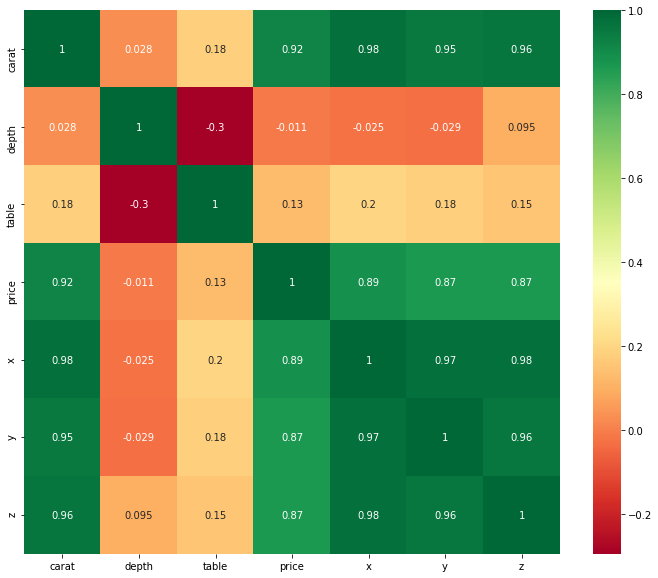

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

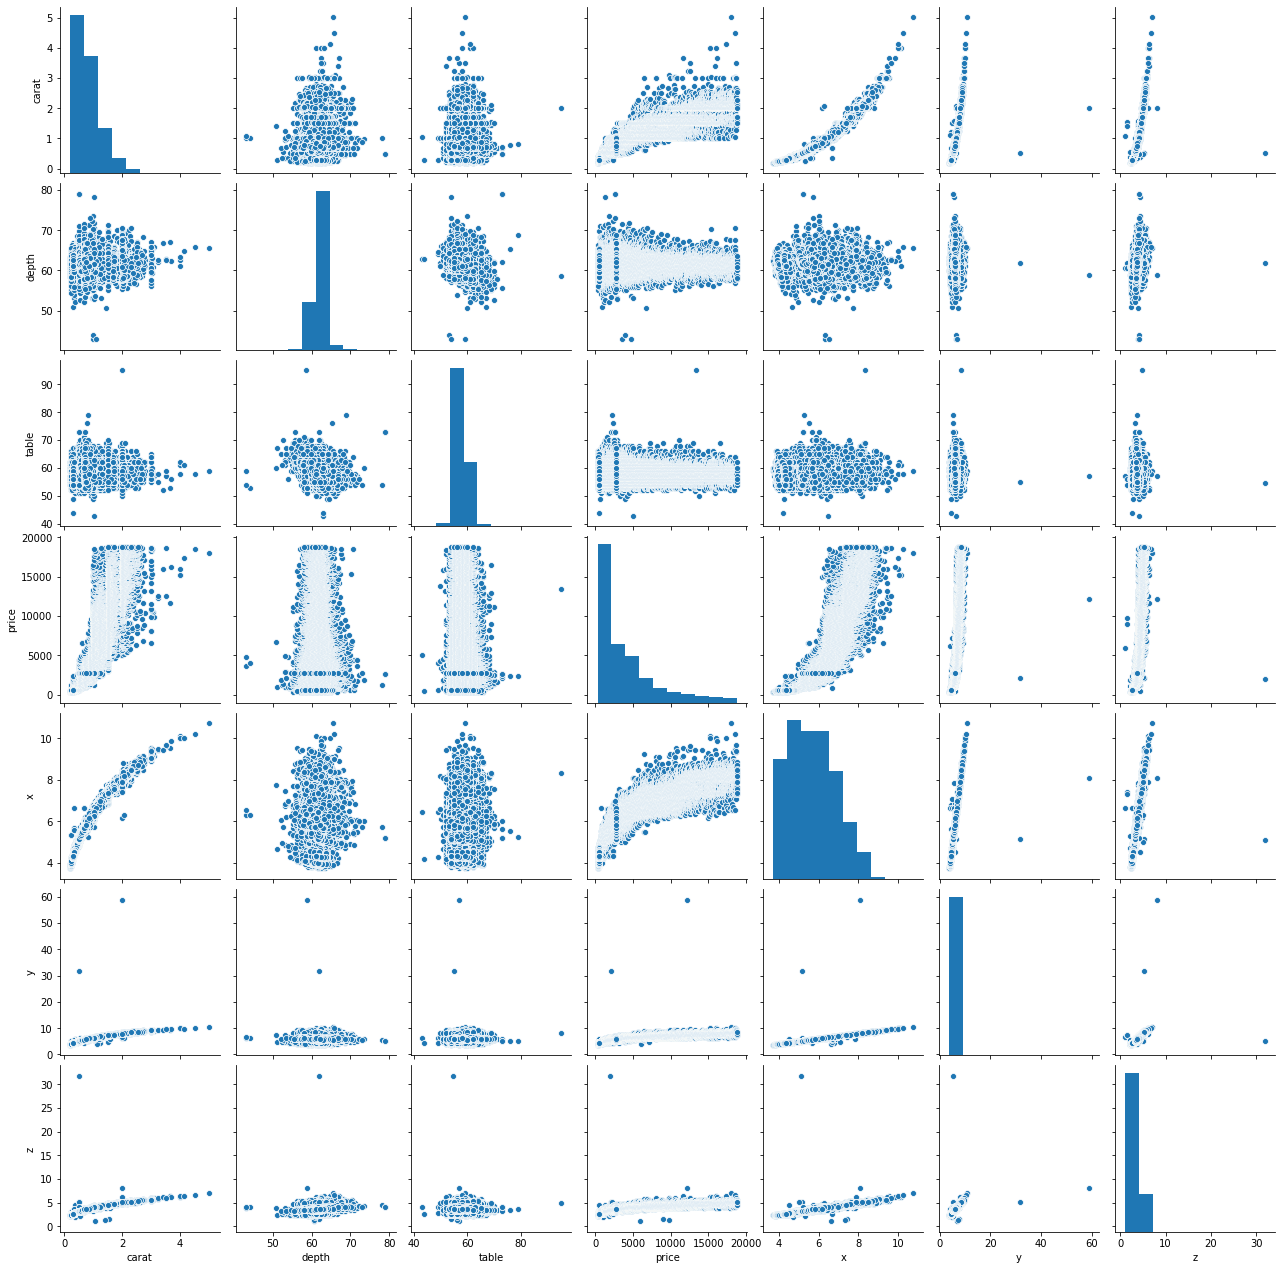

In [55]:
sns.pairplot(data)

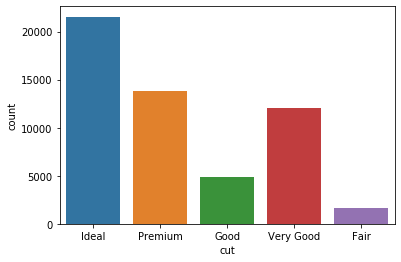

In [58]:
sns.countplot(data['cut'])

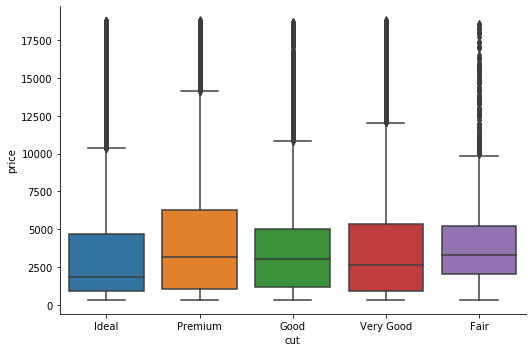

In [66]:
sns.catplot(kind='box',x='cut',y='price',data=data,aspect=1.5)

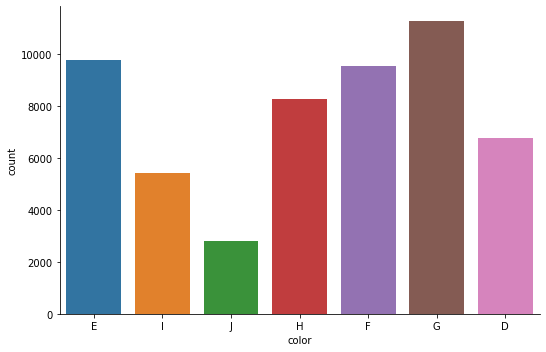

In [99]:
sns.catplot(kind='count',data=data,x='color',aspect=1.5)

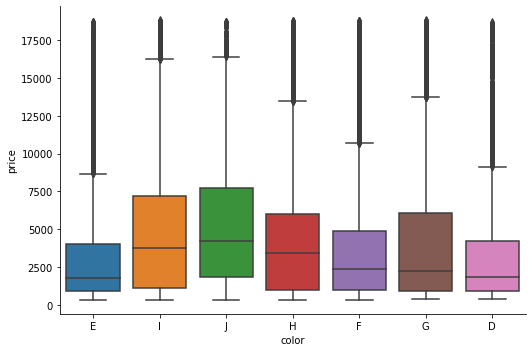

In [100]:
sns.catplot(kind='box',data=data,x='color',y='price',aspect=1.5)

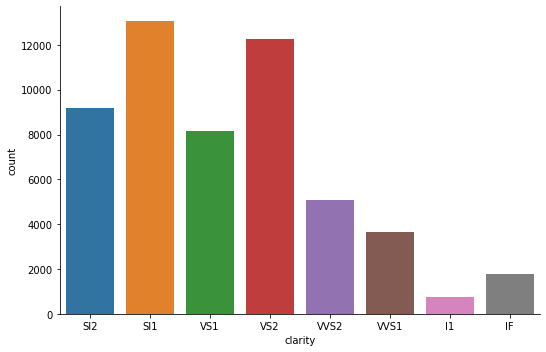

In [101]:
sns.catplot(kind='count',data=data,x='clarity',aspect=1.5)

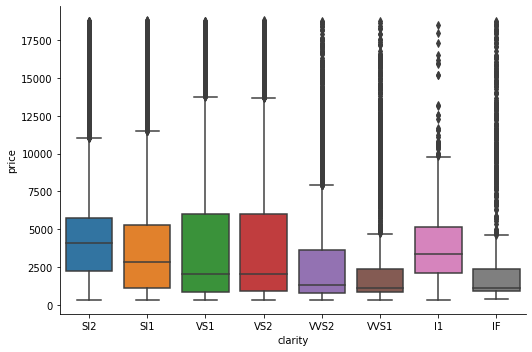

In [102]:
sns.catplot(kind='box',data=data,x='clarity',y='price',aspect=1.5)

In [103]:
data = pd.get_dummies(data)

In [105]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

In [112]:
X = data.drop(['price'],axis=1)
y = data['price']

In [113]:
scaler = StandardScaler()

In [116]:
scaled_data = scaler.fit_transform(X)

In [118]:
X_scaled = pd.DataFrame(scaled_data,columns=X.columns)
X_scaled

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,-0.175381,-0.316234,1.225692,-0.585917,...,-0.334328,-0.234389,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,-0.175381,-0.316234,-0.815866,1.706727,...,-0.334328,-0.234389,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,-0.175381,3.162213,-0.815866,-0.585917,...,-0.334328,-0.234389,-0.1178,-0.185303,-0.565442,-0.453123,2.366380,-0.542311,-0.269617,-0.32202
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,-0.175381,-0.316234,-0.815866,1.706727,...,2.991071,-0.234389,-0.1178,-0.185303,-0.565442,-0.453123,-0.422586,1.843962,-0.269617,-0.32202
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,-0.175381,3.162213,-0.815866,-0.585917,...,-0.334328,4.266413,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53915,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004,-0.175381,-0.316234,1.225692,-0.585917,...,-0.334328,-0.234389,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
53916,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575,-0.175381,3.162213,-0.815866,-0.585917,...,-0.334328,-0.234389,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
53917,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403,-0.175381,-0.316234,-0.815866,-0.585917,...,-0.334328,-0.234389,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617,-0.32202
53918,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622,-0.175381,-0.316234,-0.815866,1.706727,...,-0.334328,-0.234389,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617,-0.32202


## Splitting the data into Training and Test data

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [205]:
R2_scores = []
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'AdaBoost Regression',
          'Gradient Boosting Regression', 'Random Forest Regression', 'Decision Tree Regressor', 
          'Kneighbors Regression', 'SVR']

# Linear Regression

In [206]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [207]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

Accuracy :  92.14932137762177 %
[0.91554111 0.92011407 0.87813051 0.91797805 0.92190362]
Mean Absolute Error :  734.9420469997153
Mean Squared Error :  1239244.6880503383
Root Mean Squared Error :  1113.213675827933
R2 Score :  0.9214932137762177


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


# Lasso Regression

In [208]:
model = Lasso(normalize=True)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [209]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

Accuracy :  87.8169849508969 %
[0.88060189 0.88318305 0.88462454 0.88546999 0.88844311]
Mean Absolute Error :  866.235309885209
Mean Squared Error :  1923112.3078968618
Root Mean Squared Error :  1386.7632486826517
R2 Score :  0.8781698495089689


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


# Ridge Regression

In [210]:
model = Ridge(normalize=True)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [211]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

Accuracy :  80.3049863584042 %
[0.80372773 0.7951191  0.79667615 0.8051616  0.80800021]
Mean Absolute Error :  1125.2534805961911
Mean Squared Error :  3108895.7032141094
Root Mean Squared Error :  1763.206086427253
R2 Score :  0.803049863584042


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


# AdaBoost Regression

In [212]:
model = AdaBoostRegressor(n_estimators=1000)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [213]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.2s finished


Accuracy :  78.37713933650384 %
[0.82383458 0.8645572  0.83181838 0.87743508 0.74453384]
Mean Absolute Error :  1642.089294994167
Mean Squared Error :  3413210.0556643116
Root Mean Squared Error :  1847.487498107717
R2 Score :  0.7837713933650384


# Gradient Boosting Regression

In [214]:
model = GradientBoostingRegressor(n_estimators=1000,loss='ls',max_depth=1,verbose=1)
model.fit(X_train,y_train)
pred = model.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1    14103193.3830           26.13s
         2    12489865.7814           23.14s
         3    11159436.8101           20.72s
         4     9972856.0502           19.50s
         5     8994738.5856           18.71s
         6     8110005.3769           18.15s
         7     7375000.3427           17.81s
         8     6737517.9130           17.67s
         9     6173234.6346           17.47s
        10     5698753.2289           17.34s
        20     3150624.9942           16.73s
        30     2336888.1245           16.07s
        40     2050946.7407           15.82s
        50     1894134.8934           15.45s
        60     1777553.7468           15.28s
        70     1688278.4550           15.04s
        80     1615348.3514           14.91s
        90     1552905.6058           14.67s
       100     1499568.2591           14.52s
       200     1215315.7891           12.63s
       300     1114747.8173           11.08s
       40

In [215]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

      Iter       Train Loss   Remaining Time 
         1    14100320.6317           17.13s
         2    12501123.5785           15.00s
         3    11160150.0118           14.42s
         4     9971117.3813           13.99s
         5     8985803.0647           13.70s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         6     8103832.4344           13.76s
         7     7372987.3154           14.00s
         8     6732747.9956           14.03s
         9     6164759.0649           13.93s
        10     5688719.6239           13.86s
        20     3133301.3960           13.92s
        30     2317907.0329           13.38s
        40     2032383.3277           13.03s
        50     1876829.7031           12.80s
        60     1760545.7004           12.56s
        70     1671671.9378           12.37s
        80     1599233.4411           12.23s
        90     1537191.4103           12.06s
       100     1483730.2460           11.93s
       200     1200485.6490           10.19s
       300     1100371.9012            8.80s
       400     1056662.5561            7.51s
       500     1034798.3679            6.23s
       600     1023419.8371            4.97s
       700     1017257.0179            3.72s
       800     1013357.5744            2.48s
       900     1010470.3833            1.24s
      1000

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished


# Random Forest Regression

In [216]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [217]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


Accuracy :  98.02092960513532 %
[0.97890984 0.98095931 0.9825574  0.97869364 0.98061857]
Mean Absolute Error :  276.2264123782735
Mean Squared Error :  312400.0601836868
Root Mean Squared Error :  558.927598337823
R2 Score :  0.9802092960513532


# Decision Tree Regressor

In [218]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [219]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  96.48390407271987 %
[0.96278545 0.96250652 0.96704668 0.96186677 0.96136282]
Mean Absolute Error :  365.5490747609627
Mean Squared Error :  555022.4904299236
Root Mean Squared Error :  744.9983157228771
R2 Score :  0.9648390407271987


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


# KNeighbor Regressor

In [220]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [221]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.1s finished


Accuracy :  95.06465571629322 %
[0.94844418 0.94675941 0.94639223 0.94547787 0.95144875]
Mean Absolute Error :  438.67763353115726
Mean Squared Error :  779053.567401088
Root Mean Squared Error :  882.6401120508222
R2 Score :  0.9506465571629322


# SVR

In [222]:
model = SVR()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [223]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,pred)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,verbose=1)
print('Accuracy : ',model.score(X_test,y_test)*100, '%')
print(accuracies)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ',R2)
R2_scores.append(R2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.3min finished


Accuracy :  31.37366869791488 %
[0.25773513 0.22973841 0.24490469 0.25168545 0.2638682 ]
Mean Absolute Error :  1773.3924151202584
Mean Squared Error :  10832798.107933342
Root Mean Squared Error :  3291.3216354427204
R2 Score :  0.3137366869791488


# Visualising the R2 scores

In [232]:
scores = pd.DataFrame({'Models':models,'R2-Scores':R2_scores})
scores = scores.sort_values(by='R2-Scores',ascending=False)

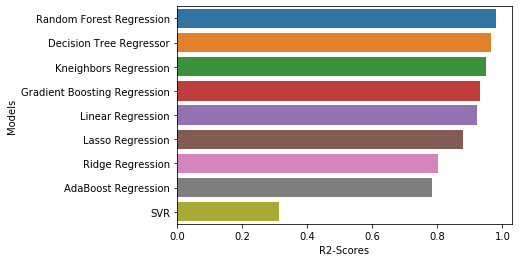

In [233]:
sns.barplot(x='R2-Scores',y='Models',data=scores)